In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

import json
from PIL import Image
import scipy

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
cd /gdrive/My\ Drive/ClassificationImages/Shape/dogs_vs_cats_pytorch

/gdrive/My Drive/ClassificationImages/Shape/dogs_vs_cats_pytorch


In [0]:
# with open("../mappings/pytorch_to_imagenet_2012_id.json") as f:
#     idxMap = json.load(f)

with open('imagenet_classes.txt') as f:
# with open('../mappings/imagenet_to_label_2012_v2.txt') as f:    
    labels = [line.strip() for line in f.readlines()]    

In [0]:
!pip install torchattacks

In [0]:
from torchattacks import FGSM, PGD

In [0]:
# labels

In [0]:
# overlapped_classes
# data['Alarm clock']
# idxMap

In [0]:
# for i in overlapped_classes:
#     print(data[i] in labels)
#     print(f"{i} : {data[i]}")
# del model

In [0]:
from torchvision import models
dir(models)



# model = models.alexnet(pretrained=True)
model = models.resnet152(pretrained=True)
# model = models.inception_v3(pretrained=True)
# model = models.googlenet(pretrained=True)

model.eval()


In [0]:
def predict_image(image_path, draw=False):
    # Define transformations for the image, should (note that imagenet models are trained with image size 224)
    transform = transforms.Compose([
#         transforms.CenterCrop(224),
        transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))    

    ])
    
#     import pdb; pdb.set_trace()
    if isinstance(image_path, str):
        img = Image.open(image_path).convert("RGB")
    else:
        img = image_path 
    
#     xl, yl, xr, yr = box
#     img = img.crop((xl, yl, xr, yr))   #((left, top, right, bottom)) 
    img = img.resize((224, 224))

    img_t = transform(img).float()

#     img_t = img_t.permute((0,1,2))
#     img_t = torch.transpose(img_t, 0, 1)  # rotate
    
    if draw:
        plt.imshow(img) #img_t.permute((2,1,0)) )
    # ##    plt.imshow(torch.transpose(img_t.permute((1,2,0)),  0, 1))
        plt.show()

#     print(img_t.shape)
    # Preprocess the image
#     image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
#     image_tensor = image_tensor.unsqueeze_(0)
    image_tensor = img_t.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor.cuda()

    # Turn the input into a Variable
#     input = Variable(image_tensor)

    # Predict the class of the image
    output = model(image_tensor)

#     index = output.data.numpy().argmax()  # top 1
    _, indices = torch.sort(output.data, descending=True)
#     [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    return indices[0][:5] # index

In [0]:
# len(data)
# dirMap[category]


In [0]:
pwd

'/content'

In [0]:
pred = predict_image('./imgs/1.jpg')


> <ipython-input-160-dd1f108e9fdf>(12)predict_image()
-> if isinstance(image_path, str):


(Pdb)  n


> <ipython-input-160-dd1f108e9fdf>(13)predict_image()
-> img = Image.open(image_path).convert("RGB")


(Pdb)  img.shape


(178, 283, 3)


(Pdb)  type(img)


<class 'numpy.ndarray'>


(Pdb)  img.dytype


*** AttributeError: 'numpy.ndarray' object has no attribute 'dytype'


(Pdb)  img.dtype


dtype('uint8')


(Pdb)  q


BdbQuit: 

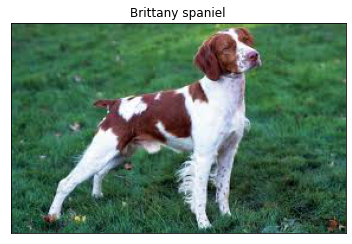

In [0]:
# Import Pillow


# img_t = img_t.permute((2,1,0))

# img_t = torch.transpose(img_t, 0, 1)

# np.clip
# img_t = torch.unsqueeze(img_t, 0)
# help(img_t.transpose)


pred = predict_image('./imgs/1.jpg')
plt.title(labels[pred[0].item()])
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# img = cv2.imread("../images/air_freshener/01d44a4b77b44a0.png", cv2.IMREAD_UNCHANGED)
# img = cv2cvLoadImage("../images/air_freshener/01d44a4b77b44a0.png", CV_LOAD_IMAGE_UNCHANGED)


## edge detection

In [0]:
pip install scikit-image


In [0]:
from skimage import io, color, feature

def detect_edge(data):
    edge_maps = np.zeros_like(data)
    for idx,img in enumerate(data):
#         import pdb; pdb.set_trace()
        edge_maps[idx,0] = feature.canny(np.array(img[0], dtype=np.float64))#, sigma = 1, low_threshold=1.5) #, high_threshold=.1)

    return edge_maps

In [0]:

import cv2
def auto_canny(image, sigma=100):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged

In [0]:
# Converting the image to grayscale.
import cv2

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def detect_edge_new(img):
  fgbg = cv2.createBackgroundSubtractorMOG2(
        history=10,
        varThreshold=2,
        detectShadows=False)

  gray = np.array(img.mean(axis=2)*255).astype('uint8')

  # Extract the foreground
  edges_foreground = cv2.bilateralFilter(gray, 9, 75, 75)
  foreground = fgbg.apply(edges_foreground)

  # Smooth out to get the moving area
  kernel = np.ones((50,50),np.uint8)
  foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)

  # Applying static edge extraction
  edges_foreground = cv2.bilateralFilter(gray, 9, 75, 75)
  edges_filtered = cv2.Canny(edges_foreground, 30, 100)

  # Crop off the edges out of the moving area
  cropped = (foreground // 255) * edges_filtered

  return cropped#edges_filtered

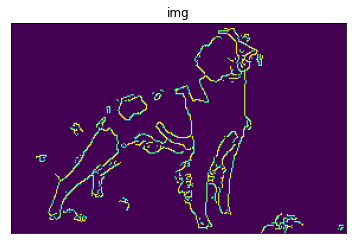

In [0]:
img_2 = np.array(img).astype('uint8')/255.
edge_map = detect_edge_new(img_2)
# auto_canny(img_2)

plt.title(f"img")
plt.imshow(edge_map)
plt.xticks([])
plt.yticks([])
plt.show()

## Perform the attack now and repeat

In [0]:
fgsm_attack = FGSM(model, eps=2/256)

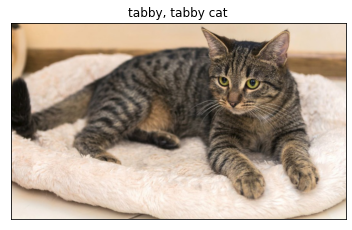

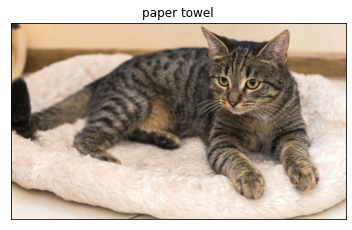

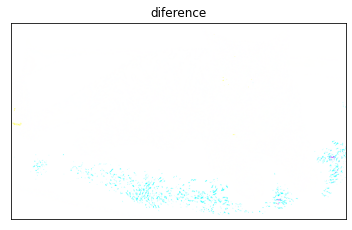

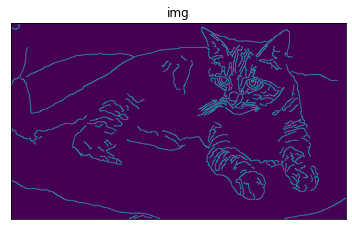

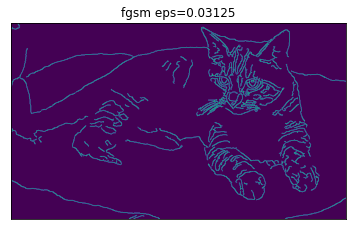

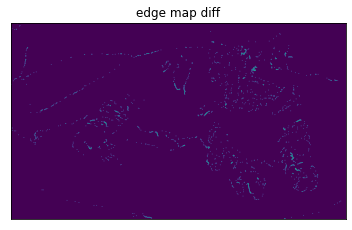

In [0]:
img_name = '6'


from PIL import Image
img = Image.open(f'./imgs/{img_name}.jpg').convert('RGB')

# edge_map = detect_edge(img[None]/255.)



pred = predict_image(f'./imgs/{img_name}.jpg')
plt.title(labels[pred[0].item()])
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()


transform = transforms.Compose([
#         transforms.CenterCrop(224),
    transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))    

])
img_adv = fgsm_attack(transform(img).unsqueeze(0),torch.tensor([pred[0].item()]))
# img_adv = img_adv - torch.tensor((0.485, 0.456, 0.406))

output = model(img_adv)
#     index = output.data.numpy().argmax()  # top 1
_, indices = torch.sort(output.data, descending=True)


pred = indices[0][:5]

plt.title(labels[pred[0].item()])
plt.imshow(img_adv[0].permute(1,2,0))
plt.xticks([])
plt.yticks([])
plt.show()



# plt.title('diference')
# plt.imshow(img_adv[0].permute(1,2,0)*255 - np.array(img))
# plt.xticks([])
# plt.yticks([])
# plt.show()


plt.title('diference')
# diff = torch.norm(img_adv[0].permute(1,2,0)*255 - np.array(img), float('inf'))
# diff = torch.abs(img_adv[0].permute(1,2,0)*255 - np.array(img))
diff = torch.abs(img_adv[0].permute(1,2,0)*255 - np.array(img))
diff = (diff - diff.min()) / (diff.max() - diff.min())
# diff = img_adv[0].permute(1,2,0)*255 - np.array(img)
plt.imshow(diff)
plt.xticks([])
plt.yticks([])
plt.show()





# img = np.array(img*255)
# img_2 = np.array(img).astype('uint8')
# edge_map = auto_canny(img_2)
img_2 = np.array(img).astype('uint8')/255.
edge_map = detect_edge_new(img_2)

plt.title(f"img")
plt.imshow(edge_map)
plt.xticks([])
plt.yticks([])
plt.show()



# img_avd_2 = np.array(img_adv*255.).astype('uint8')
# edge_map_adv = auto_canny(img_avd_2[0].transpose(1,2,0))
img_avd_2 = np.array(img_adv*255.).astype('uint8')/255.
edge_map_adv = detect_edge_new(img_avd_2[0].transpose(1,2,0))


plt.title(f"fgsm eps={8/256}")
plt.imshow(edge_map_adv)
plt.xticks([])
plt.yticks([])
plt.show()


plt.title(f"edge map diff")
plt.imshow(edge_map-edge_map_adv)
plt.xticks([])
plt.yticks([])
plt.show()

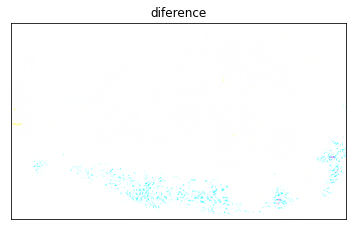

In [0]:
plt.title('diference')
# diff = torch.norm(img_adv[0].permute(1,2,0)*255 - np.array(img), float('inf'))
# diff = torch.abs(img_adv[0].permute(1,2,0)*255 - np.array(img))
diff = torch.abs(img_adv[0].permute(1,2,0)*255 - np.array(img)/1.)
diff = (diff - diff.min()) / (diff.max() - diff.min())
# diff = img_adv[0].permute(1,2,0)*255 - np.array(img)
plt.imshow(diff)
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
# torch.abs(diff.max())
diff.max()
edge_map.max()
# (img_adv[0].permute(1,2,0)*255).max()
# np.array(img).max()
# np.array(img).min()
# (img_adv[0].permute(1,2,0)*255).min()
# diff.shape

255

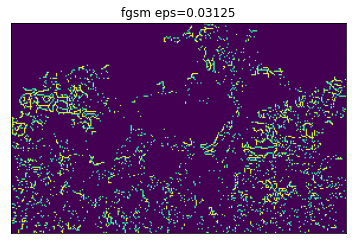

In [0]:
plt.title(f"fgsm eps={8/256}")
plt.imshow(edge_map-edge_map_adv)
plt.xticks([])
plt.yticks([])
plt.show()


In [0]:
np.array(img).max()
img_avd_2.shape

(1, 3, 178, 283)

In [0]:
img = Image.open("./imgs/1.jpg").convert('RGB')
np.array(img_adv).astype('uint8').dtype

dtype('uint8')

In [0]:
img_avd_2.dtype

dtype('uint8')

In [0]:
inp = cv2.dnn.blobFromImage(np.array(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


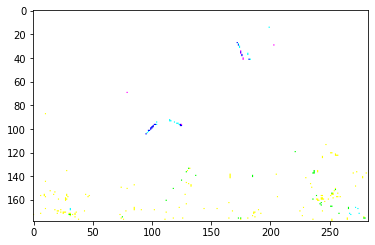

In [0]:
plt.imshow(inp[0].transpose(1,2,0))

In [0]:
net.setInput(inp)
out = net.forward()
out = out[0, 0]
out = cv.resize(out, (frame.shape[1], frame.shape[0]))
out = 255 * out
out = out.astype(np.uint8)
out=cv.cvtColor(out,cv.COLOR_GRAY2BGR)
con=np.concatenate((frame,out),axis=1)
cv.imshow(kWinName,con)

NameError: name 'net' is not defined

In [0]:
!sh download_pretrained.sh

sh: download_pretrained.sh: No such file or directory


In [0]:
from torch import nn


x = torch.randn(1, 1, requires_grad=True)
lin = nn.Linear(1, 1) # your model or manual operations
out = lin(x)
print(out.grad_fn)
out.backward()

In [0]:
x

tensor([[0.3500]], requires_grad=True)